In [76]:
import numpy as np

#okay we are going really back to basics and let us just generate a radiation pattern that is equal to 1/r**2

def my_ceil(a, precision=0):
    return np.round(a + 0.5 * 10**(-precision), precision)

def my_floor(a, precision=0):
    return np.round(a - 0.5 * 10**(-precision), precision)


def signal_strength(point):
    #point is an numpy array in the form (x,y,z)
    r = np.sqrt(point[:,0]**2 +point[:,1]**2 + point[:,2]**2) 
    return my_floor(1/r,4)


In [77]:
point = np.array([[1,0,0],[2,0,0]])

In [78]:
points = np.random.randint(low = -1000, high =1000,size = [1000000,3])

In [79]:
signal_strength(points)

array([0.0015, 0.001 , 0.0008, ..., 0.0012, 0.001 , 0.0011])

In [80]:
ans = np.column_stack([points,signal_strength(points)])

In [81]:
import pandas as pd

df = pd.DataFrame(ans,columns = ['X','Y','Z','RSSI'])

In [82]:
df.to_csv('Fake_Calibration_Data.csv')

In [83]:
def radius(point,ref_point):
    diff = point - ref_point
    radius_from_reference = np.sqrt(np.sum(diff**2))
    
    return radius_from_reference

In [94]:
station_1 = np.array([0,0,0])
station_2 = np.array([0,-200,0])
station_3 = np.array([100*np.sqrt(3),-100,0])

point = np.array([321,-12,29])


def find_multiple_detection_strengths(point,station_1,station_2,station_3):
    rad_1 = radius(point,station_1)
    rad_2 = radius(point,station_2)
    rad_3 = radius(point,station_3)

    strength_1 = my_floor(1/rad_1,4)
    strength_2 = my_floor(1/rad_2,4)
    strength_3 = my_floor(1/rad_3,4)


    return [strength_1,strength_2,strength_3]

In [85]:
strength_1,strength_2,strength_3

(0.0031, 0.0026, 0.0057)

Starting position: (10, 5, 15)
Ending position: (293.98094043545325, 211.22237392814253, 27.808948296146383)


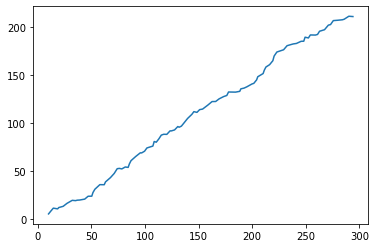

In [88]:
import random
import matplotlib.pyplot as plt

def three_d_random_walk(start_x, start_y, start_z, num_steps):
    """
    Simulates a 3D random walk with a step radius of 5.

    Args:
      start_x: Starting x-coordinate.
      start_y: Starting y-coordinate.
      start_z: Starting z-coordinate.
      num_steps: Number of steps in the walk.

    Returns:
      A list of tuples representing the (x, y, z) coordinates at each step.
    """
    walk = [(start_x, start_y, start_z)]
    for _ in range(num_steps):
        # Generate a random direction vector within a radius of 5
        dx = random.uniform(1, 5) # biasing the walk to the right
        dy = random.uniform(-1, 5)
        dz = random.uniform(-5, 5)

        # Update the current position
        new_x = walk[-1][0] + dx
        new_y = walk[-1][1] + dy
        new_z = np.abs(walk[-1][2] + dz)

        # Append the new position to the walk
        walk.append((new_x, new_y, new_z))

    return walk

# Example usage
x = 10
y = 5
z = 15
steps = 100


walk_path = three_d_random_walk(x, y, z, steps)


df = pd.DataFrame(walk_path,columns=['X','Y','Z'])

plt.plot(np.array(df.X),np.array(df.Y))



# Print the starting and ending positions
print(f"Starting position: ({x}, {y}, {z})")
print(f"Ending position: {walk_path[-1]}")

# You can further analyze the walk path here (optional)


In [98]:
random_walk_strengths = []

for i in range(len(walk_path)):
    random_walk_strengths.append(find_multiple_detection_strengths(np.array(walk_path[i]),station_1,station_2,station_3))

In [103]:
df = pd.DataFrame(random_walk_strengths,columns=['Station 1','Station 2','Station 3'])
df1 = pd.DataFrame(walk_path,columns=['X','Y','Z'])

In [105]:
df

,Station 1,Station 2,Station 3
0,0.0534,0.0048,0.0051
1,0.0477,0.0047,0.0051
2,0.0369,0.0047,0.0051
3,0.0320,0.0047,0.0052
4,0.0303,0.0046,0.0052
...,...,...,...
96,0.0028,0.0020,0.0030
97,0.0028,0.0020,0.0030
98,0.0028,0.0020,0.0030
99,0.0027,0.0019,0.0029


In [107]:
df.to_csv('Random_Walk_Detections.csv')
df1.to_csv('Random_Walk.csv')

Ignore Below

In [86]:
1/rad_3

0.005732722015871017

In [ ]:
import numpy as np

# Define parameters
A_min = -110  # Minimum intensity (-65 for decay to -110)
A_max = -65  # Initial intensity
sigma = 500  # Radius of decay (standard deviation)

# Generate random points within a cube of side length 2 * radius
num_points = 1000
x = np.random.uniform(-sigma, sigma, num_points)
y = np.random.uniform(-sigma, sigma, num_points)
z = np.random.uniform(-sigma, sigma, num_points)

# Calculate distance from the origin (source)
distance = np.sqrt(x**2 + y**2 + z**2)

# Normalize distance to range between 0 and 1 (radius)
normalized_distance = distance / sigma

# Calculate intensity using a linear interpolation between A_min and A_max
intensity = A_min + (A_max - A_min) * (1 - normalized_distance)

# Further analysis (optional)
# - Plot the intensity distribution in 3D using visualization libraries
# - Use the intensity values for further calculations depending on your specific needs

#print("Intensity values:", intensity[:10])  # Print the first 10 intensity values


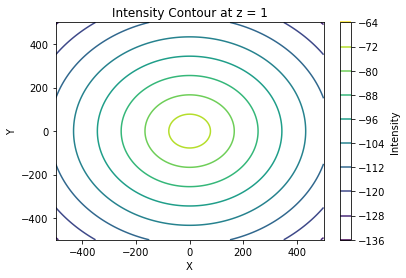

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define parameters
A_min = -110  # Minimum intensity (-65 for decay to -110)
A_max = -65  # Initial intensity
sigma = 500  # Radius of decay (standard deviation)
z_slice = 1  # Fixed z value for the contour plot

# Generate grid of points in the x-y plane
num_points = 200
x = np.linspace(-sigma, sigma, num_points)
y = np.linspace(-sigma, sigma, num_points)
X, Y = np.meshgrid(x, y)

# Calculate distance from the origin
distance = np.sqrt(X**2 + Y**2 + z_slice**2)

# Normalize distance to range between 0 and 1 (radius)
normalized_distance = distance / sigma

# Calculate intensity using linear interpolation
intensity = A_min + (A_max - A_min) * (1 - normalized_distance)

# Create contour plot
plt.contour(X, Y, intensity, cmap='viridis')  # Adjust 'viridis' for desired colormap
plt.colorbar(label='Intensity')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Intensity Contour at z = {z_slice}')
plt.show()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Station locations
station1 = np.array([0, 0, 0])
station2 = np.array([0, -200, 0])
station3 = np.array([100 * np.sqrt(3), -100, 0])


def calculate_field_stength(point,station_1 = station1,station_2 = station2,station_3 = station3):
    # Define parameters (same as before)
    A_min = -110  # Minimum intensity
    A_max = -65  # Initial intensity
    sigma = 500  # Radius of decay
    
    #point is 1x3 matrix of (X,Y,Z) point
    # Calculate distance from each station to the point
    distance1 = np.linalg.norm(point - station_1)
    distance2 = np.linalg.norm(point - station_2)
    distance3 = np.linalg.norm(point - station_3)
    
    # Normalize distances
    normalized_distance1 = distance1 / sigma
    normalized_distance2 = distance2 / sigma
    normalized_distance3 = distance3 / sigma

    # Calculate intensity from each station
    intensity1 = A_min + (A_max - A_min) * (1 - normalized_distance1)
    intensity2 = A_min + (A_max - A_min) * (1 - normalized_distance2)
    intensity3 = A_min + (A_max - A_min) * (1 - normalized_distance3)

    # Total field strength (sum of intensities)
    total_field_strength = np.round(np.array([intensity1,intensity2,intensity3]))

    return(total_field_strength)

In [4]:
calculate_field_stength([321,-12,29])

array([-94., -99., -81.])

Starting position: (10, 5, 15)
Ending position: (309.0652757941827, 196.52509095417915, 0.5053511096543062)


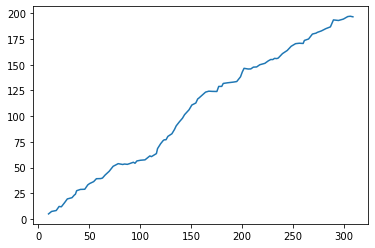

In [5]:
import random

def three_d_random_walk(start_x, start_y, start_z, num_steps):
    """
    Simulates a 3D random walk with a step radius of 5.

    Args:
      start_x: Starting x-coordinate.
      start_y: Starting y-coordinate.
      start_z: Starting z-coordinate.
      num_steps: Number of steps in the walk.

    Returns:
      A list of tuples representing the (x, y, z) coordinates at each step.
    """
    walk = [(start_x, start_y, start_z)]
    for _ in range(num_steps):
        # Generate a random direction vector within a radius of 5
        dx = random.uniform(1, 5) # biasing the walk to the right
        dy = random.uniform(-1, 5)
        dz = random.uniform(-5, 5)

        # Update the current position
        new_x = walk[-1][0] + dx
        new_y = walk[-1][1] + dy
        new_z = np.abs(walk[-1][2] + dz)

        # Append the new position to the walk
        walk.append((new_x, new_y, new_z))

    return walk

# Example usage
x = 10
y = 5
z = 15
steps = 100


walk_path = three_d_random_walk(x, y, z, steps)


df = pd.DataFrame(walk_path,columns=['X','Y','Z'])

plt.plot(np.array(df.X),np.array(df.Y))



# Print the starting and ending positions
print(f"Starting position: ({x}, {y}, {z})")
print(f"Ending position: {walk_path[-1]}")

# You can further analyze the walk path here (optional)


In [6]:
df

,X,Y,Z
0,10.000000,5.000000,15.000000
1,12.970949,7.392302,16.201149
2,17.559468,8.306994,21.036315
3,20.371597,12.236397,16.107424
4,22.587257,11.930524,19.059619
...,...,...,...
96,294.893440,192.958840,6.745971
97,299.674735,194.293196,5.687911
98,304.029878,196.766542,4.381308
99,306.456941,197.067940,0.232391


In [7]:
calculate_field_stength(walk_path[-1])

array([ -98., -110.,  -94.])

In [8]:
walk_path[-1]

(309.0652757941827, 196.52509095417915, 0.5053511096543062)

In [9]:
walk_path_stength = []

for i in range(0,len(walk_path)):
    value_at_point = calculate_field_stength(walk_path[i])
    walk_path_stength.append(value_at_point)

In [10]:
df

,X,Y,Z
0,10.000000,5.000000,15.000000
1,12.970949,7.392302,16.201149
2,17.559468,8.306994,21.036315
3,20.371597,12.236397,16.107424
4,22.587257,11.930524,19.059619
...,...,...,...
96,294.893440,192.958840,6.745971
97,299.674735,194.293196,5.687911
98,304.029878,196.766542,4.381308
99,306.456941,197.067940,0.232391


In [11]:
df2 = pd.DataFrame(walk_path_stength,columns=['Antenna 1','Antenna 2','Antenna 3'])

In [12]:
df2

,Antenna 1,Antenna 2,Antenna 3
0,-67.0,-84.0,-83.0
1,-67.0,-84.0,-82.0
2,-68.0,-84.0,-82.0
3,-68.0,-84.0,-82.0
4,-68.0,-84.0,-82.0
...,...,...,...
96,-97.0,-109.0,-94.0
97,-97.0,-110.0,-94.0
98,-98.0,-110.0,-94.0
99,-98.0,-110.0,-94.0


In [13]:
df.to_csv('Random_Walk.csv')

In [14]:
df2.to_csv('Random_Walk_Detections.csv')

In [15]:
random_calib_sampling = np.random.randint([-500,-500,0],[500,500,500],size=[300000,3])

In [16]:
calibration_data = []

for i in range(0,len(random_calib_sampling)):
    value_at_point = calculate_field_stength(random_calib_sampling[i])
    calibration_data.append(value_at_point)

In [17]:
df = pd.DataFrame(calibration_data,columns=['Antenna 1','Antenna 2','Antenna 3'])

In [1]:
calibration_data

NameError: name 'calibration_data' is not defined

In [18]:
RSSI_List = df['Antenna 1'].to_list()

In [19]:
random_calib_sampling[0]

array([-316,  473,  214])

In [20]:
X_Y_Z = np.row_stack(random_calib_sampling)

In [21]:
df = pd.DataFrame(np.column_stack([X_Y_Z,RSSI_List]),columns=['X','Y','Z','RSSI'])

In [22]:
df

,X,Y,Z,RSSI
0,-316.0,473.0,214.0,-120.0
1,256.0,202.0,493.0,-118.0
2,-143.0,-245.0,356.0,-106.0
3,-467.0,-67.0,150.0,-110.0
4,355.0,382.0,348.0,-121.0
...,...,...,...,...
299995,332.0,11.0,10.0,-95.0
299996,308.0,375.0,355.0,-119.0
299997,231.0,309.0,362.0,-113.0
299998,336.0,-310.0,41.0,-106.0


In [23]:
df.to_csv('Fake_Calibration_Data.csv')

In [24]:
pwd

'/home/main/Research/BIWF_Data'

(array([ 1873., 15314., 39784., 70017., 66618., 52319., 31604., 14694.,
         6647.,  1130.]),
 array([-142. , -134.4, -126.8, -119.2, -111.6, -104. ,  -96.4,  -88.8,
         -81.2,  -73.6,  -66. ]),
 <BarContainer object of 10 artists>)

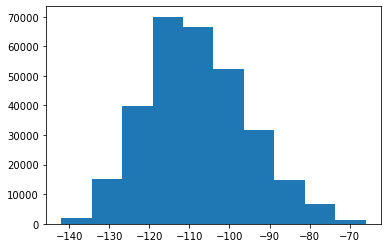

In [25]:
plt.hist(df.RSSI)

In [26]:
import numpy as np
from matplotlib import pyplot as plt


def ellipsoid(X,Y,a,b,c,x0,y0,z0):
    z = np.sqrt((1-(X-x0)**2/a**2 -(Y-y0)**2/b**2)*c**2)+z0
    return 



In [27]:
# Generate grid of points for the contour plot (focusing on positive x-axis)
x = np.linspace(0, 2, 100)  # Only positive x-values
y = np.linspace(-6, 6, 100)


z = ellipsoid(x,y,a=1,b=6,c=1,x0=1,y0=0,z0=0)



/tmp/ipykernel_240503/3071594678.py:6: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt((1-(X-x0)**2/a**2 -(Y-y0)**2/b**2)*c**2)+z0


In [28]:
import pandas as pd

df = pd.DataFrame(np.column_stack([x,y,z]))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 100 and the array at index 2 has size 1

In [ ]:
rot_mat = np.eye(3) # zero degree
rot_mat = np.array([[0,-1,0],[1,0,0],[0,0,1]]) #90 degree

In [ ]:
np.matmul(df.,rot_mat)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Define ellipsoid parameters (adjust these values)
a = 10  # Semi-major axis (x-direction)
b = 20  # Semi-minor axis (y-direction)
c = 5  # Semi-minor axis (z-direction)

# Define decay function (exponential decay in this example)
def decay(distance):
    return np.exp(-distance / 2)  # Adjust decay rate as needed

# Generate grid of points for the contour plot (focusing on positive x-axis)
x = np.linspace(0, a, 100)  # Only positive x-values
y = np.linspace(-b, b, 100)

X, Y = np.meshgrid(x, y)

# Calculate distance from origin for each point
Z = np.sqrt(X**2 / a**2 + Y**2 / b**2)

# Apply decay function
Z = Z * decay(np.sqrt(X**2 + Y**2))

# Create contour plot
fig, ax = plt.subplots()
ax.contourf(X, Y, Z, cmap='viridis')  # Adjust colormap for visualization

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('Contour Plot of Antenna Radiation Pattern (Ellipsoid)')

# Optional: Add a point for the antenna at (0, 0)
ax.scatter(0, 0, c='red', marker='o', label='Antenna')
plt.legend()

# Set limits to exclude negative x-axis
ax.set_xlim([0, a])

plt.show()